In [1]:
from POSEIDON.utility import read_high_res_data
from POSEIDON.high_res import fit_uncertainties
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.ndimage import gaussian_filter1d, median_filter
from POSEIDON.high_res import fast_filter

In [2]:
# from copy import deepcopy

# def running_filter_1D(data1, func, length, cval=np.nan, verbose=True):
#     data = deepcopy(data1)
#     if isinstance(data, np.ma.MaskedArray):
#         data = data.filled(fill_value=np.nan)

#     if length % 2 != 1:
#         raise ValueError("length should be odd.")

#     n = len(data)
#     sides = int((length - 1) / 2)
#     data_ext = np.pad(data, sides, "constant", constant_values=cval)
#     # Generate index for each interval to apply filter
#     # Same as [np.arange(i,i+length) for i in range(n)] but quicker
#     index = np.arange(length)[None, :] + np.arange(n)[:, None]

#     try:
#         out = func(data_ext[index], axis=1)
#     except TypeError as e:
#         if verbose:
#             print(e, "so may take longer.")
#             print("Consider using numpy func with axis keyword.")
#         out = [func(x) for x in data_ext[index]]

#     #     mask = ~np.isfinite(out) | np.isnan(data)

#     return out

In [4]:
for n in range(1, 2):
    data_dir = f"data/WASP-76b-MAROON/night_{n}/"
    data = read_high_res_data(data_dir)
    data_raw = data["data_raw"]
    Ndet, Nphi, Npix = data_raw.shape
    # uncertainties = fit_uncertainties(data_raw, NPC=5)
    C_norm = np.zeros(data_raw.shape)
    for k in range(Ndet):
        order = data_raw[k]
        median = np.nanmedian(order, axis=0)
        # median[median == 0] = np.mean(median)
        order_norm = order / median
        C_norm[k] = order_norm

    for det in range(Ndet):
        for phi in range(Nphi):
            C_norm[det][phi] = median_filter(C_norm[det][phi], size=501)

    for det in range(Ndet):
        for phi in range(Nphi):
            C_norm[det][phi] = gaussian_filter1d(C_norm[det][phi], sigma=100)

    data_blaze_corrected = data_raw / C_norm
    wl_grid = data["wl_grid"]

    uncertainties = fit_uncertainties(data_blaze_corrected, NPC=5)
    # pickle.dump(
    #     [wl_grid, data_blaze_corrected],
    #     open(data_dir + "/data_blaze_corrected.pic", "wb"),
    # )

    data_norm = np.zeros_like(data_blaze_corrected)
    for i in range(len(data_blaze_corrected)):
        order = data_blaze_corrected[i]

        median = np.median(order, axis=0)
        # median[median == 0] = np.mean(median)
        order_norm = order / median

        uncertainty = uncertainties[i]

        uncertainty_norm = uncertainty / median

        uncertainties[i] = uncertainty_norm
        data_norm[i] = order_norm

    residuals, Us = fast_filter(data_norm, uncertainties, N_iter=15)
    pickle.dump(uncertainties, open(data_dir + "/uncertainties.pic", "wb"))
    Bs = np.zeros((Ndet, Nphi, Nphi))

    for j in range(Ndet):
        U = Us[j]
        L = np.diag(1 / np.mean(uncertainties[j], axis=-1))
        B = U @ np.linalg.pinv(L @ U) @ L
        Bs[j] = B

    pickle.dump([Bs, residuals], open(data_dir + "/fast_filter.pic", "wb"))

/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.09309176655032053 6.5698205647533445


/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.09084271422920615 7.182363725167038


/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.09020829684833973 7.175222447182495


/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.09153254467998352 7.284966611729032


/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.09157162750115799 7.889330790742612


/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.09227299829924533 6.585823545032975


/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.08974862005173292 7.544660276036971


/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.08734935333704988 8.449729963546424


/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.08549286212489228 9.379466163547628


/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.08633687365717013 9.432146601162021


/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.08664522781119403 9.726895992729553


/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.08553437605352454 11.651540446554485


/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.0828754873843679 12.847792218440059


/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.08303087546620357 13.036067232548518


/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.08380708997751588 9.992023428451695


/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.08322709028218109 12.05864155304691


/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.08230833351820202 14.432424969803794


/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.08113931803031638 17.826289880676804


/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.08117759826750988 17.335937203240434


/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.08161354243178148 17.55436871988781


/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.08311817194522868 8.68734034942618


/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.08254510093966153 9.979812359633023


/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.0826976818833699 9.22074463899116


/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.08308168733057449 9.711341577120713


/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.0831402622458229 10.505508180542504


/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.08257007518888176 11.384480647920643


/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.08249010741326268 10.747435642632482


/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.08149823614606598 10.562622878729119


/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.0825715680635139 7.163579876249062


/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.08409684403219624 5.275924756061631


/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.08644096948494392 4.97382202518401


/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.08441530996568852 6.251801358952212


/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.08673881123437642 3.5957225558893855


/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:566: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.08529951219982279 3.6193052973129207


In [33]:
# from sklearn.decomposition import TruncatedSVD
# from scipy.optimize import minimize


# def PCA_single_order(order, NPC=5):
#     rebuilt = np.zeros(order.shape)
#     # take only columns that do not have nan values
#     mean = np.nanmean(order, axis=0)
#     mean_subtracted_order = order - mean
#     finitecols = np.isfinite(np.mean(mean_subtracted_order, axis=0))

#     svd = TruncatedSVD(n_components=NPC, n_iter=5, random_state=42).fit(
#         mean_subtracted_order[:, finitecols]
#     )
#     # rebuild the data with only N pcas
#     rebuilt[:, finitecols] = (
#         svd.transform(mean_subtracted_order[:, finitecols]) @ svd.components_
#     )
#     # add back the mean
#     rebuilt += mean
#     residual = order - rebuilt
#     return rebuilt, residual


# def fit_uncertainties(data_raw, NPC=5):
#     uncertainties = np.zeros(data_raw.shape) * np.nan
#     residuals = np.zeros(data_raw.shape)
#     N_order = len(data_raw)
#     for i in range(N_order):
#         order = data_raw[i]
#         _, residual = PCA_single_order(order)
#         residuals[i] = residual

#     for i in range(N_order):
#         order = data_raw[i].clip(min=0.1)

#         def fun(x):
#             a, b = x
#             sigma = np.sqrt(a * order + b)
#             loglikelihood = -0.5 * np.sum((residuals[i] / sigma) ** 2) - np.sum(
#                 np.log(sigma)
#             )
#             return -loglikelihood

#         a, b = minimize(fun, [1, 200], method="Nelder-Mead").x
#         print(a, b)
#         best_fit = np.sqrt(a * order + b)
#         rebuilt, _ = PCA_single_order(best_fit)
#         uncertainties[i] = rebuilt

#     return uncertainties

In [37]:
# from scipy.ndimage import gaussian_filter1d, median_filter
# from astropy.convolution import convolve, convolve_fft
# from astropy.convolution import Gaussian1DKernel

# gauss = Gaussian1DKernel(stddev=100)
# for det in range(Ndet):
#     for phi in range(Nphi):
#         gi = np.isnan(C_norm[det][phi])
#         # C_norm[det][phi] = median_filter(C_norm[det][phi], size=501)
#         C_norm[det][phi] = running_filter_1D(C_norm[det][phi], np.nanmedian, 501)
#         C_norm[det][phi][gi] = np.nan

# for det in range(Ndet):
#     for phi in range(Nphi):
#         # C_norm[det][phi] = gaussian_filter1d(C_norm[det][phi], sigma=100)
#         C_norm[det][phi] = convolve(
#             C_norm[det][phi], gauss, boundary="extend", preserve_nan=True
#         )

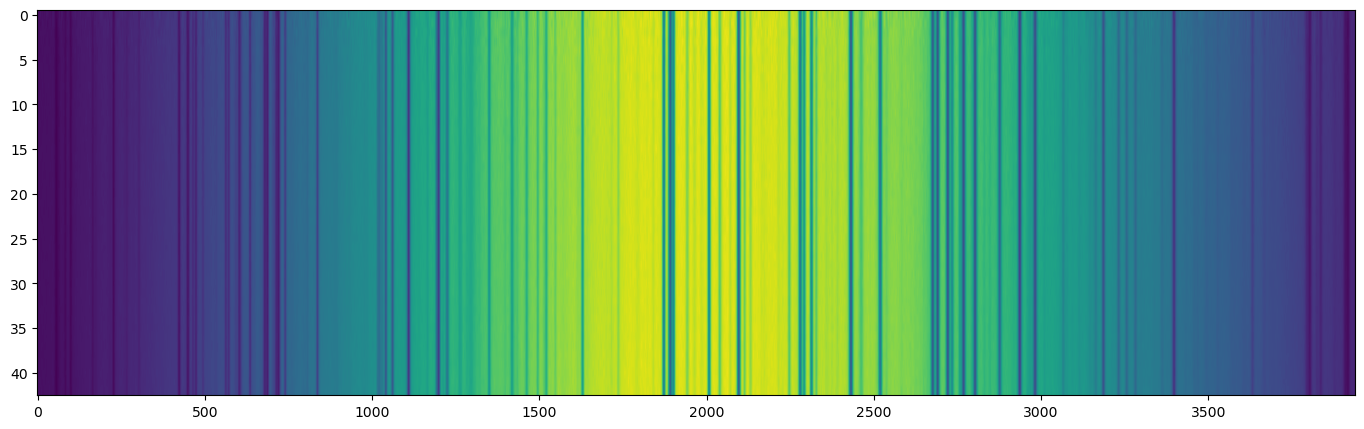

In [43]:
plt.figure(figsize=(17, 5))
plt.imshow(data_blaze_corrected[3], aspect="auto")

In [46]:
output_path = "./CC_output/WASP-76b-MAROON/"  # Could modify output path here.

In [45]:
data = read_high_res_data("./data/WASP-76b-MAROON/night_1/")